## Generating Feature spaces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Distributions as dist
import importlib
importlib.reload(dist)

<module 'Distributions' from 'C:\\Users\\koket\\spectra_for_features\\Distributions.py'>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

## Compute the auto-correlation function

1. The standard way of computing th 2-point correlation function (a function of separation) is:
$$\tilde{\epsilon}(r) = \frac{N_{PR}}{N_{DP}} \frac{DD(r)}{RR(r)} -1 $$

Here $ N_{PR} $ and $ N_{PR} $ refere to the total number of pairs in a uniformly distributed data and in the catalog data; and; $ DD(r)$ and $RR(r)$ referer to the number at points per separation r in the data and  in the unform sample

In [2]:
def compute_pairwise_distances(points):
    """
    Compute the pairwise distances between all points.

    Args:
        points (np.ndarray): 2D array of points (n_points, 2).

    Returns:
        distances (np.ndarray): 1D array of pairwise distances.
    """
    n_points = len(points)
    distances = []
    
    # Loop over all pairs of points
    for i in range(n_points):
        for j in range(i + 1, n_points):
            # Compute Euclidean distance between points i and j
            dist = np.linalg.norm(points[i] - points[j])
            distances.append(dist)
    
    return np.array(distances)


# Computes the number of pairs per separation
def pairs_per_separation(distances, n_bins, max_distance):
    
    max_distance= max(distances)

    pairs_per_interval, bin_edges = np.histogram(distances, bins=n_bins, range=(0, max_distance))

        
    # Compute bin centers
    separation = 0.5 * (bin_edges[1:] + bin_edges[:-1])


    
    return separation, pairs_per_interval


#Computoing the actual 2-point correlation function

def standard_2_point(pairs_per_distance_in_data, pairs_per_distance_in_uniform,n_points,n_uniform_points):
    ##Compute the total number of computeed pairs in each of the distributions( random and data)
    
    N_dp = n_points*(n_points-1)/2
    N_pr = n_uniform_points*(n_uniform_points-1)/2

    #Compute the two point correlation

    two_point = (N_pr/N_dp)*(pairs_per_distance_in_data/pairs_per_distance_in_uniform) - 1
    
        
    return two_point

## Computeing the Landy-Szalay auto-correlation function

1. The Landy-Szalay (1993) method of computing th 2-point correlation function (a function of separation) is:
$$\tilde{\epsilon_{LS}}(r) = c_1 \frac{DD(r)}{RR(r)} - c_2\frac{DR(r)}{RR(r)} +1 $$

 $ DD(r)$ is the number of pairs per bin in data 
 
 $RR(r)$  is the number of pairs per bin in a uniform distribution
 
 $DR(r)$ is the number of pairs between the data and the uniform distribution
 

$c_1$ := $\frac{N_R(N_R-1)}{N_D(N_D - 1)}$ and 
$c_2$ := $\frac{2N_R (N_R -1)}{N_DN_R}$

In [3]:
## compute cross pairwise distances
def compute_cross_distances(data_points,random_points):
 
    n_points = len(data_points)
    n_random_points = len(random_points)
    distances = []
    
    # Loop over all pairs of points
    for i in range(n_points):
        for j in range(n_random_points):
            # Compute Euclidean distance between points i and j
            dist = np.linalg.norm(data_points[i] - random_points[j])
            distances.append(dist)
    
    return np.array(distances)


def Landy_Szalay(DD_r,RR_r,DR_r,n_points,n_uniform_points):
    ##Compute the total number of computeed pairs in each of the distributions( random and data)
    
    c_1 = (n_uniform_points*(n_uniform_points-1))/(n_points*(n_points - 1))
    
    c_2 = (2*(n_uniform_points*(n_uniform_points-1)))/(n_points*n_uniform_points)
        
    

    #Compute the two point correlation

    two_point = c_1 *(DD_r/RR_r) - c_2*(DR_r/RR_r) + 1
    
        
    
    return two_point

## The effect of egdes

<Figure size 1920x1440 with 0 Axes>

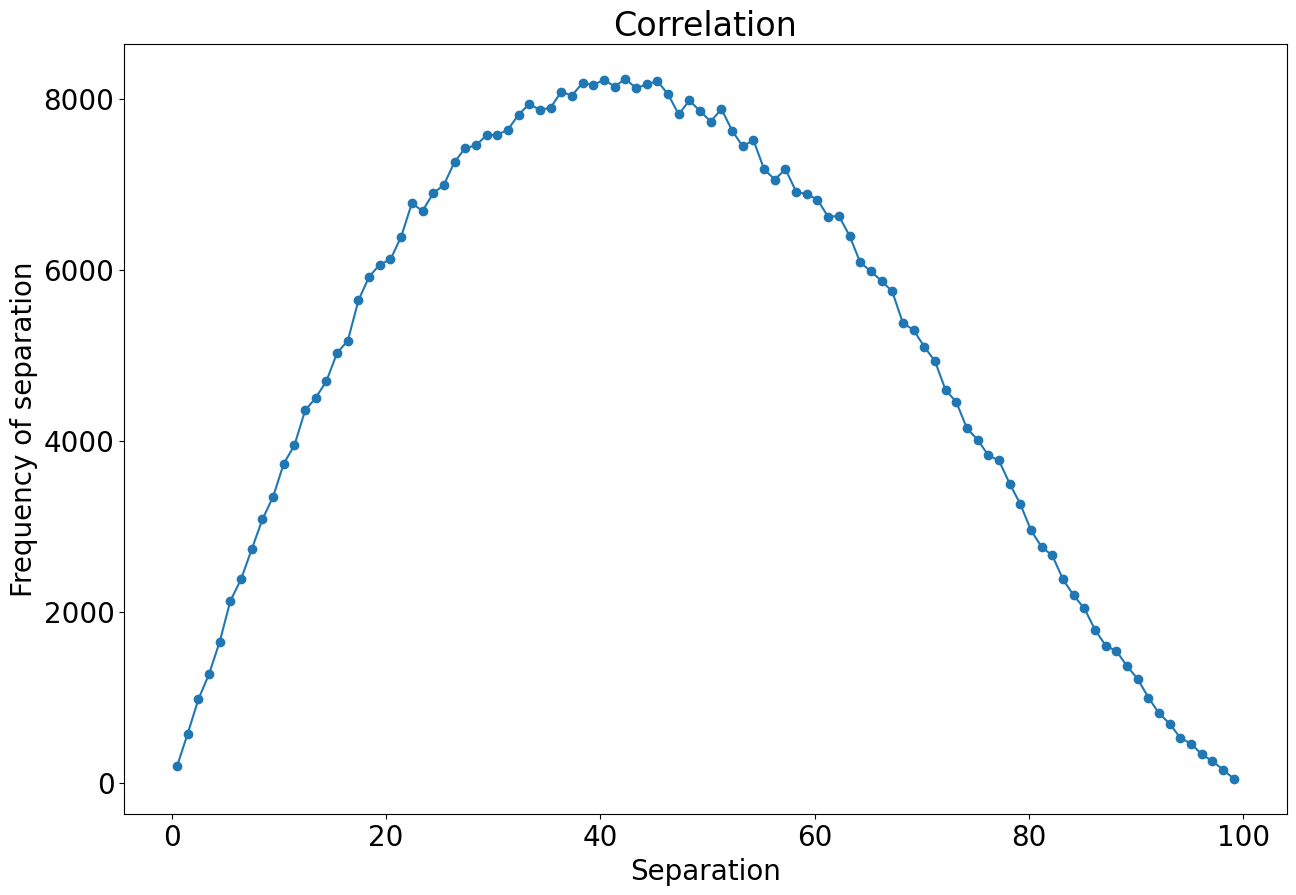

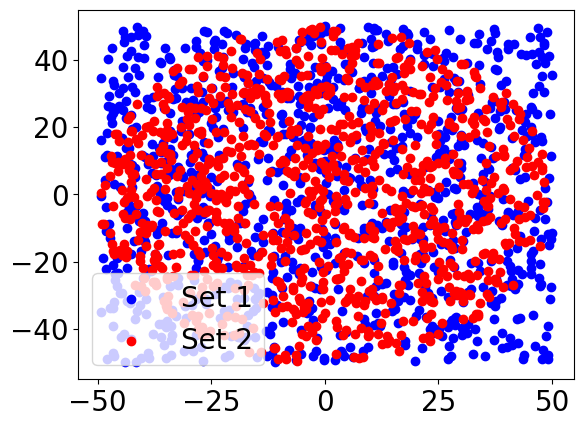

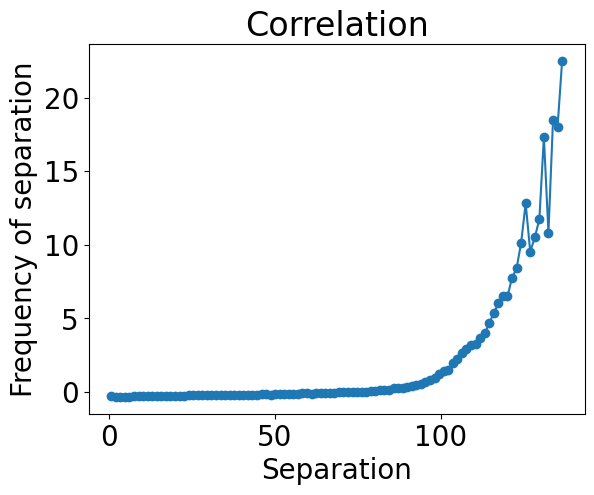

In [4]:
n_uniform_points_disk = 1000
grid_size = 100
n_bins = 100
max_distance = 1000

importlib.reload(dist)
uniform_points_disk = dist.generate_points_on_disk(grid_size/2, n_uniform_points_disk)


distances_disk = compute_pairwise_distances(uniform_points_disk)

separation_disk, uniform_correlation_disk = pairs_per_separation(distances_disk, n_bins, max_distance = None)

dist.plot_autocorrelation_2d(separation_disk, uniform_correlation_disk)
n_uniform_points_square = 1000
grid_size = 100
n_bins = 100
max_distance = 1000


uniform_points_square = dist.generate_random_points_2d(n_uniform_points_square, grid_size)

distances_square = compute_pairwise_distances(uniform_points_square)

separation, uniform_correlation_square = pairs_per_separation(distances_square, n_bins, max_distance = None)

dist.scatter_overlay(uniform_points_square,uniform_points_disk)

two_point_correlation = standard_2_point(uniform_correlation_disk, uniform_correlation_square,n_uniform_points_disk,n_uniform_points_square)


dist.plot_autocorrelation_2d(separation, two_point_correlation)

## The 2 point correlation function of points sampled from 2 gaussians

In [5]:
#For the Gaussian
dimensions = 2  
mean_range = (0, 100)
cov_range = (-50, 50)  
num_samples = 20 
points_per_gaussian = 500
n_points = points_per_gaussian*num_samples
importlib.reload(dist)

means, covariances = dist.sample_means_and_covariances(dimensions, mean_range, cov_range, num_samples)

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

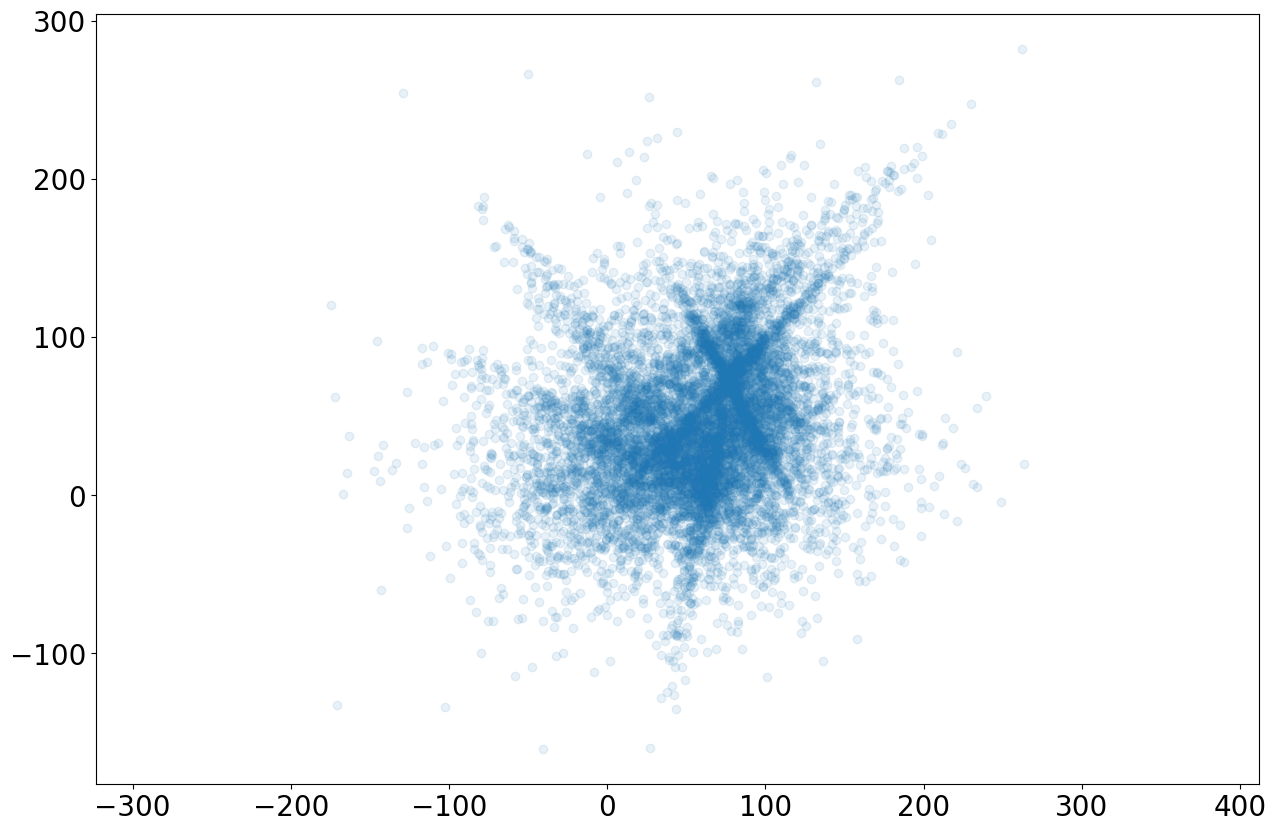

In [6]:
#Creating a feature space samples from Gaussians
importlib.reload(dist)
gaussian_space = dist.generate_gaussian_points(means[0], covariances[0],points_per_gaussian)
for mean,covariance in zip(means[1:],covariances[1:]):
    
    gaussian_space = np.concatenate((gaussian_space,dist.generate_gaussian_points(mean, covariance,points_per_gaussian)),axis = 0)

dist.scatter_points(gaussian_space, alpha = 0.10)

In [75]:
means3

array([[37.34469072, 66.24993921],
       [43.84938144, 82.83987842]])

In [72]:
means3[0] = [(means2[0][0] +means2[1][0])/2 , (means2[0][1] +means2[1][1])/2 ]



[55.90737301 45.38019523]


<Figure size 1920x1440 with 0 Axes>

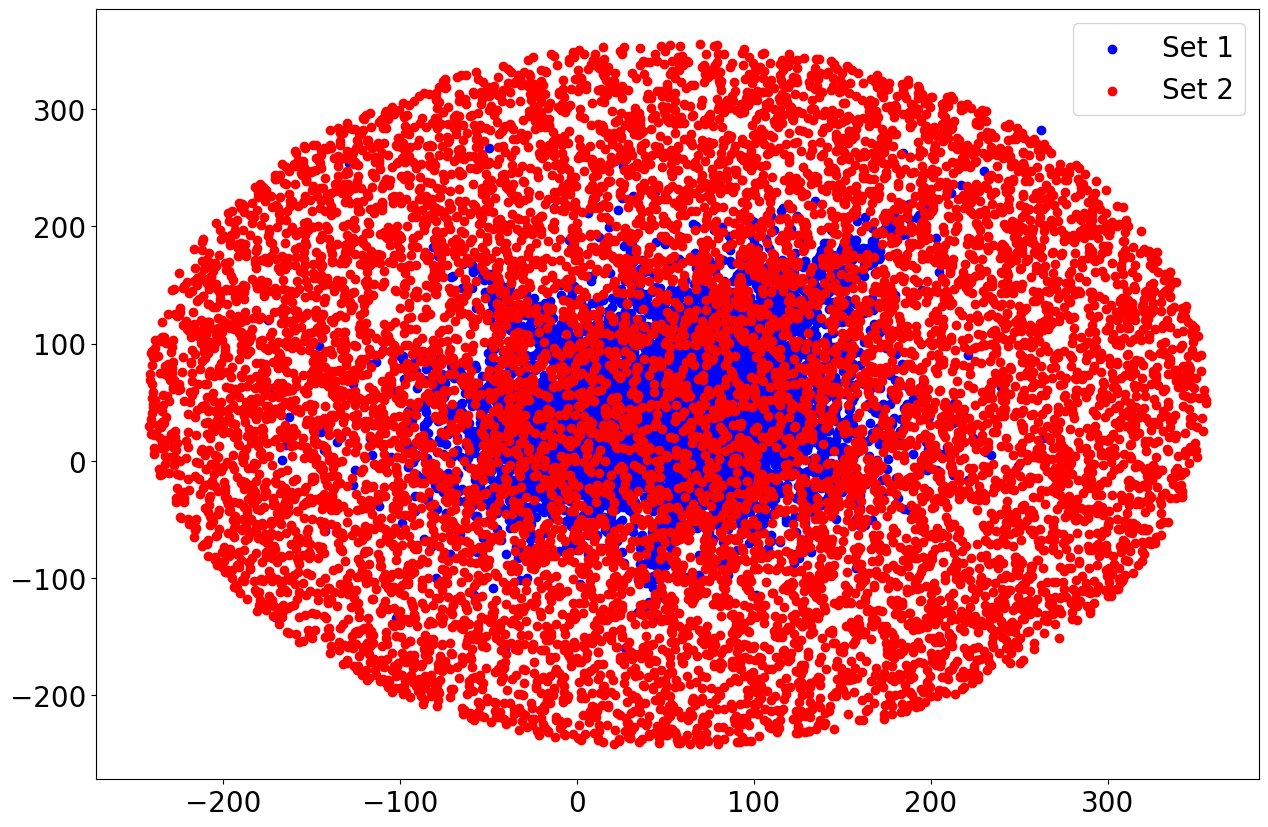

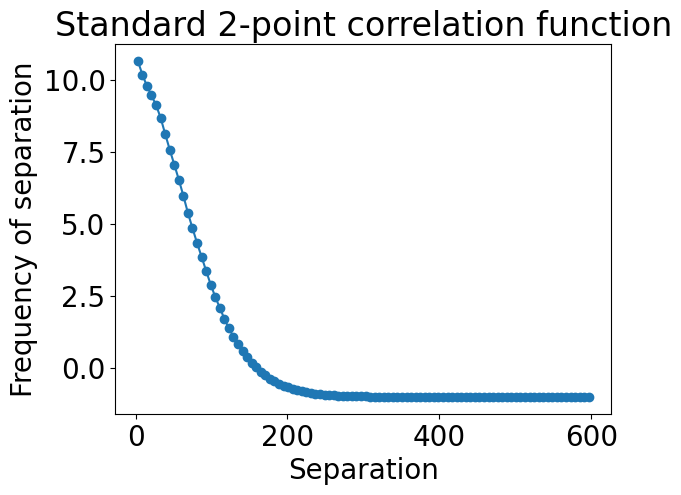

In [7]:
distances_gaussian = compute_pairwise_distances(gaussian_space)

separation, pairs_per_separation_gaussian = pairs_per_separation(distances_gaussian, n_bins, max_distance)

##The random sample
#For the uniform sample
n_uniform_points_disk = n_points
grid_size = max(distances_gaussian)
n_bins = 100
max_distance = max(distances_gaussian)
center = np.mean(gaussian_space, axis=(0))
print(center)

importlib.reload(dist)
uniform_points_disk = dist.generate_points_on_disk(grid_size/2, n_uniform_points_disk,center = center)

dist.scatter_overlay(gaussian_space,uniform_points_disk)


distances_disk = compute_pairwise_distances(uniform_points_disk)

separation_disk, pairs_per_separation_disk = pairs_per_separation(distances_disk, n_bins, max_distance = None)


#Computing the 2-point correlation function
two_point_correlation = standard_2_point(pairs_per_separation_gaussian, pairs_per_separation_disk,n_points,n_points)

dist.plot_autocorrelation_2d(separation, two_point_correlation, title = "Standard 2-point correlation function")

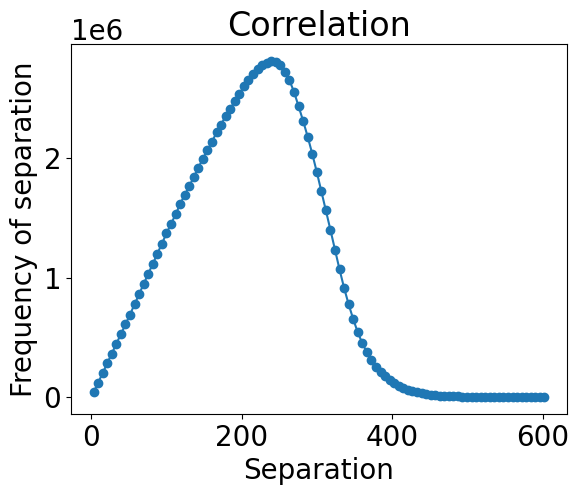

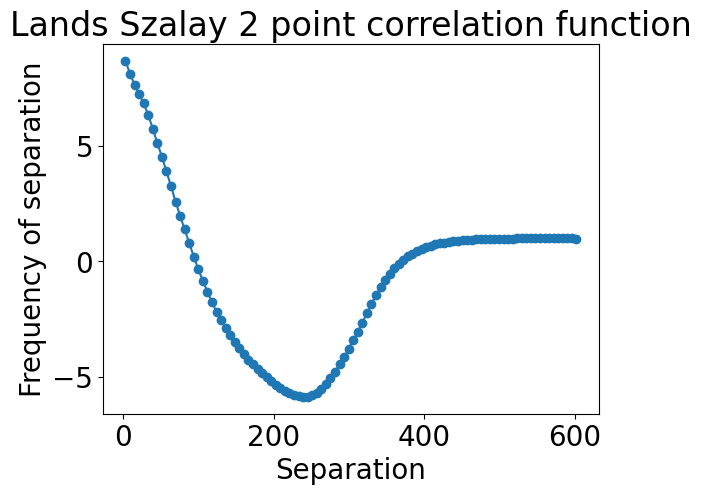

In [8]:
#Computing the Land-Szalay correlation function

cross_distances = compute_cross_distances(gaussian_space,uniform_points_disk)

separation, cross_pairs_per_separation = pairs_per_separation(cross_distances, n_bins, max_distance)

dist.plot_autocorrelation_2d(separation, cross_pairs_per_separation)


Landazy_szalay_correlation = Landy_Szalay(pairs_per_separation_gaussian,pairs_per_separation_disk,cross_pairs_per_separation,n_points,n_uniform_points_disk)

dist.plot_autocorrelation_2d(separation, Landazy_szalay_correlation, title = "Lands Szalay 2 point correlation function")

C:\Users\koket\AppData\Local\Programs\Python\Python312\Lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


<Figure size 1920x1440 with 0 Axes>

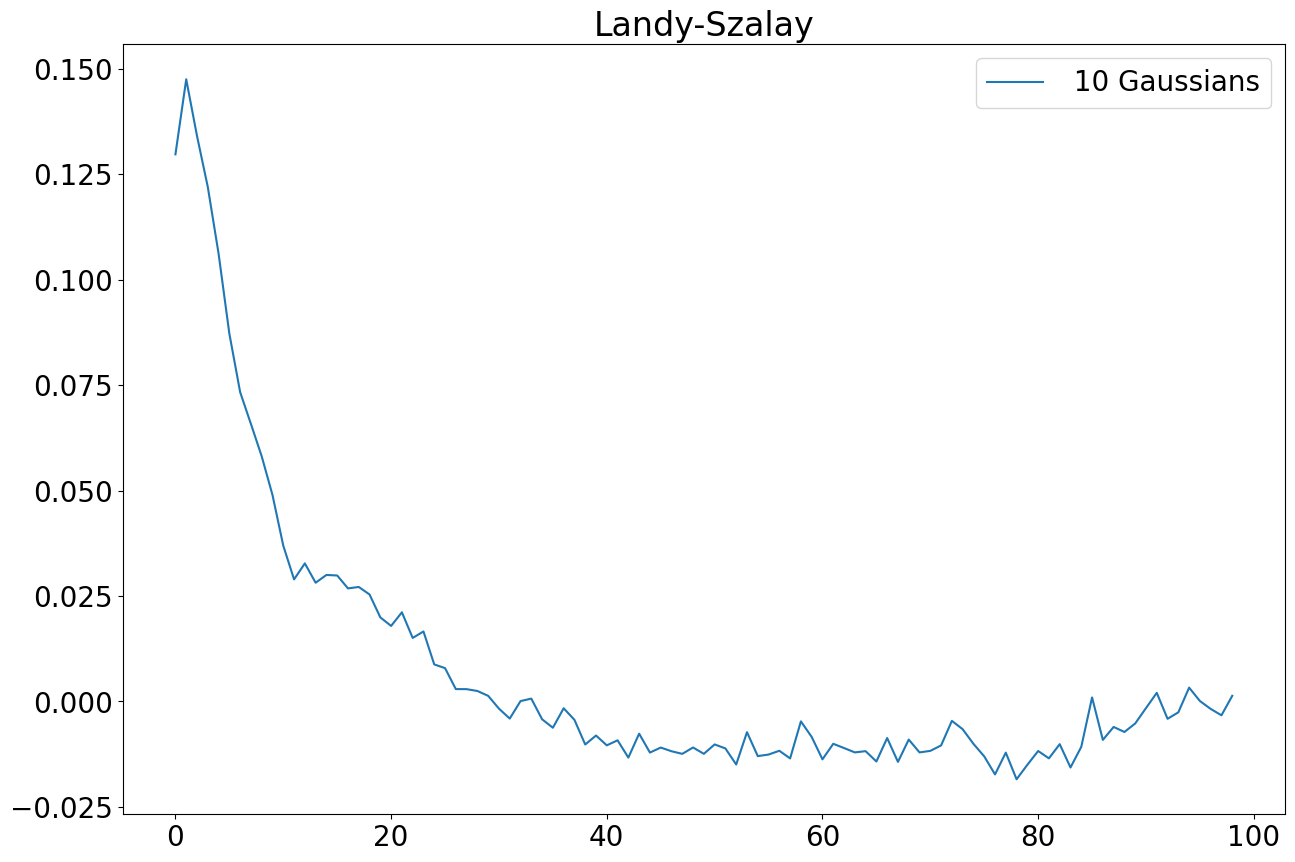

In [9]:
import numpy as np
from astroML.plotting import hist
from astroML.correlation import two_point,bootstrap_two_point
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
#font = {
 #       'weight' : 'bold',
  #      'size'   : 22}

#matplotlib.rc('font', **font)
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 

a = 150
b = 100
bins = np.linspace(0, a, b )
corr = two_point(gaussian_space , bins, method = 'landy-szalay')
import matplotlib.pyplot as plt

plt.plot(corr, label = " 10 Gaussians")
"""
#hist(corr)
#bins = np.linspace(0, a, b)
corr = two_point(uniform_points_disk , bins,method = 'landy-szalay')
#import matplotlib.pyplot as plt
plt.plot(corr, label = "Disk (diameter hundred)")
#hist(corr)

bins = np.linspace(0, a, b)
corr = two_point(uniform_points_square , bins, method  = 'landy-szalay')
import matplotlib.pyplot as plt
plt.plot(corr, label = "Square (100 by 100)")
#dist.plot_autocorrelation_2d(bins, corr,title = "Correlation")
#hist(corr)
"""
plt.title("Landy-Szalay")
plt.legend()
plt.show()


In [115]:
corr, dcorr = bootstrap_two_point(uniform_points_disk, bins, Nbootstrap=10)
print(len(dcorr),len(corr))

99 99


In [116]:
corr =  [0 if math.isnan(x) else x for x in corr]

In [ ]:
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 
plt.plot(bins[:-1],corr, label = " 2 Gaussians")
plt.fill_between(bins[:-1],corr, corr-dcorr, corr+dcorr, alpha=.4)
plt.title("Using bootstrap to compute the error")

plt.show()

In [220]:
np.allclose(corr, 0, atol=1)

True